In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
DF = pd.read_csv("https://raw.githubusercontent.com/ydafalla/EECS731-Final-Project/master/final.csv" , low_memory = False)
DF.head()

,Unnamed: 0,Passwords,length,Has_Upper,Has_Numeric,Has_SpecialChar,UpperCase_Count,LowerCase_Count,Numeric_Count,SpecialChar_Count,Alphabet_Count,Password_Source,Has_Word,Has_Name,Has_Place,Score,Password_Strength
0,0,@fl!pm0de@,10,0,1,1,0,6,1,3,6,Yahoo,0,0,0,5,Strong
1,1,pass,4,0,0,0,0,4,0,0,4,Yahoo,0,0,1,1,Weak
2,2,steveol,7,0,0,0,0,7,0,0,7,Yahoo,0,1,0,2,Weak
3,3,chotzi,6,0,0,0,0,6,0,0,6,Yahoo,0,1,0,1,Weak
4,4,lb2512,6,0,1,0,0,2,4,0,2,Yahoo,0,0,0,3,Medium


In [3]:
df1 = DF.loc[:,['length' , 'Alphabet_Count', 'Numeric_Count' , 'SpecialChar_Count', 'Score']]
df = DF.loc[:,['length' , 'Alphabet_Count', 'Numeric_Count' , 'SpecialChar_Count']]
Score = DF.loc[:,['Score']]

In [4]:
df["length"] = df["length"]/df["length"].max()
df["Alphabet_Count"] = df["Alphabet_Count"]/df["Alphabet_Count"].max()
df["Numeric_Count"] = df["Numeric_Count"]/df["Numeric_Count"].max()
df["SpecialChar_Count"] = df["SpecialChar_Count"]/df["SpecialChar_Count"].max()
df.head()

,length,Alphabet_Count,Numeric_Count,SpecialChar_Count
0,0.333333,0.200000,0.045455,0.15
1,0.133333,0.133333,0.000000,0.00
2,0.233333,0.233333,0.000000,0.00
3,0.200000,0.200000,0.000000,0.00
4,0.200000,0.066667,0.181818,0.00


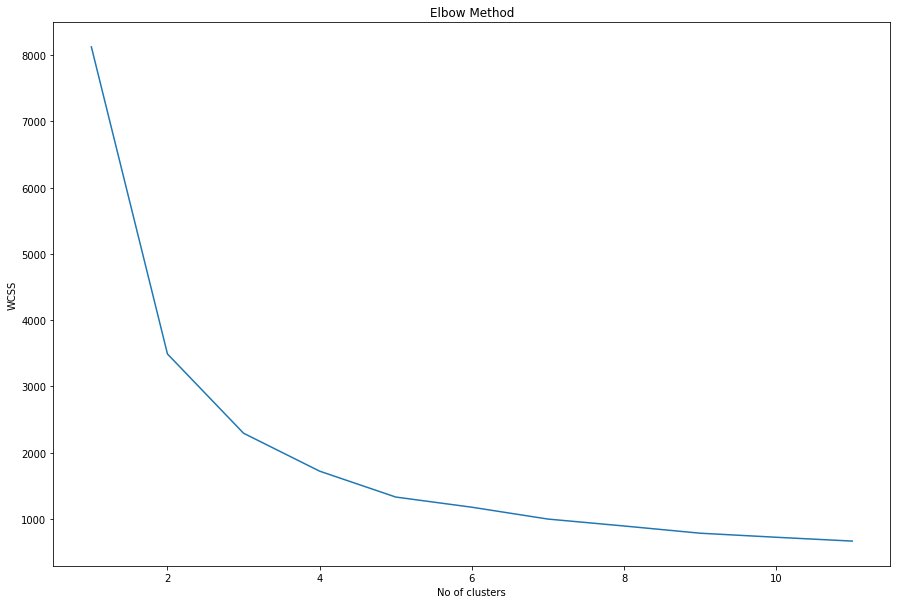

In [5]:
X = df
X = X.iloc[:,[1, 2 ,3]].values
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1,12),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()


In [6]:

kmeans = KMeans(n_clusters= 5, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)

In [7]:
df["Clusters"] = Y_Kmeans

In [8]:
counter1 = counter2 = counter3 = counter4 =  counter5 =  0
for row in df1["Score"]:
    if row == 1:
        counter1 = counter1 + 1
    elif row == 2:
        counter2 = counter2 + 1
    elif row == 3:
        counter3 = counter3 + 1
    elif row == 4:
        counter4 = counter4 + 1
    else:
        counter5 = counter5 + 1
Scores = [counter1 , counter2 , counter3 , counter4 , counter5]
Scores.sort()

In [9]:
cluster1 = cluster2 = cluster0 = cluster3 = cluster4 = 0

for row in df["Clusters"]:
    if row == 1:
        cluster1 = cluster1 + 1
    elif row == 2:
        cluster2 = cluster2 + 1
    elif row == 3:
        cluster3 = cluster3 + 1
    elif row == 4:
        cluster4 = cluster4 + 1
    else:
        cluster0 = cluster0 + 1
Cluster = [cluster0, cluster1, cluster2, cluster3, cluster4]
Cluster.sort()

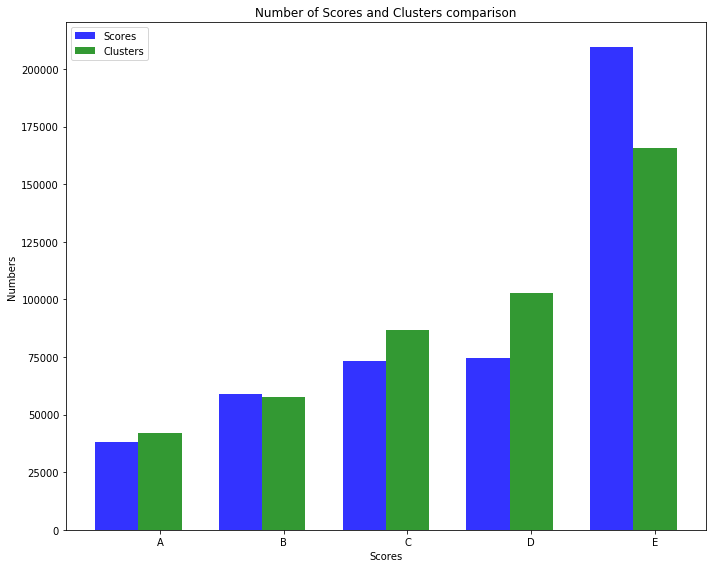

In [10]:

n_groups = 5
# create plot
fig = plt.figure(figsize=(10,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Scores, bar_width,
alpha=opacity,
color='b',
label='Scores')

rects2 = plt.bar(index + bar_width, Cluster, bar_width,
alpha=opacity,
color='g',
label='Clusters')
plt.xlabel('Scores')
plt.ylabel('Numbers')
plt.title('Number of Scores and Clusters comparison')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E'))
plt.legend()
plt.tight_layout()
plt.show()
